<center> # Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [1]:
# import numpy as np
import pandas as pd 
# import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split



Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [2]:

df = pd.read_csv('data.csv', sep=",") #wczytanie bez sztywnego dtype = xxx
df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [3]:
categorical = list(df.columns[df.dtypes == object])

print('Dane tektowe zawierają kolumny :\n\n', categorical)

Dane tektowe zawierają kolumny :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [4]:
value = df.isnull().values.any()
print("Czy istnieją braki danych: ",value)

df.dtypes

Czy istnieją braki danych:  False


age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

Baza danych nie posiada oczywistych braków danych, typ zmiennych liczbowych (ukazany przez df,dtypes) jest zapisany jako int64 - brak danych utrwalony jako dziwny zapis skutkowałby zmianą typu danych na 'object' ponieważ program nie mógłby automatycznie rozpoznać danych jako liczbowych ().

In [5]:
#dane_pełne 
#df.education.value_counts()
#df.marital_status.value_counts()
#df.relationship.value_counts()
df.race.value_counts()
#df.sex.value_counts()
#df.income.value_counts()
#dane_z_wartościami_?
#df.workclass.value_counts()
#df.occupation.value_counts()
#df.native_country.value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

dane tekstowe są pełne, kolumny workclass,occupation,native_country posiadają wartości '?' które najprawdopodobniej są odpowiednikiem "inna opcja niż podana". Na świecie jest powyżej stu różnych krajów, o wiele więcej niż klas utworzonych dla tej kolumny, "?" odpowiada opcji innych krajów. Kolumny workclass, occupation trudno jest podzielić w taki sposób, by objąć wszystkie sztywno podane możliwości, przykładem ciężkiego przypadku do określenia byłyby zawody związane z religią, wartości "?" są szybkim rozwiązaniem na ten problem kategoryzacji.

Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


#### Przypadek 'income'

In [6]:
X = df.drop(['income'], axis=1)
y = df.income
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [7]:
#pip install category_encoders


In [8]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

Dokładność modelu to:  0.7974204115057836


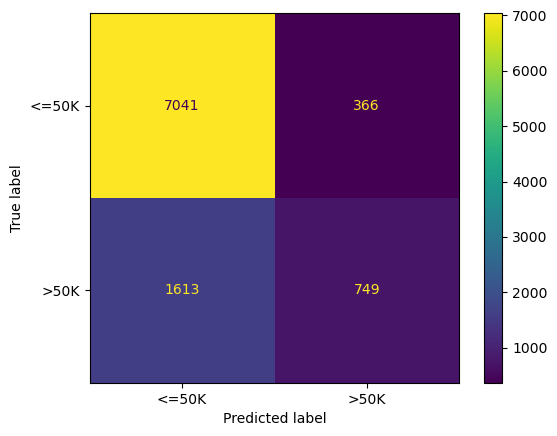

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matrix = confusion_matrix(y_test, y_pred)
print("Dokładność modelu to: ",accuracy_score(y_test, y_pred))
pmatrix = ConfusionMatrixDisplay(matrix, display_labels=['<=50K','>50K'])
pmatrix.plot()

Interpretacja: Przypadek '<=50K' jezt zgadywany z bardzo dobrą dokładnością. Większość przypadków '>50K' została błędnie zidentyfikowana, dokładność modelu obniżona została właśnie przez ten przypadek. Model poradził sobie jednak w miare dobrze, z przybliżeniem do 80% dokładności

Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

#### Przypadek 'race'

In [10]:
X = df.drop(['race'], axis=1)
y = df.race
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [11]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'sex', 'native_country', 'income'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


Dokładność modelu to:  0.8478861705394616


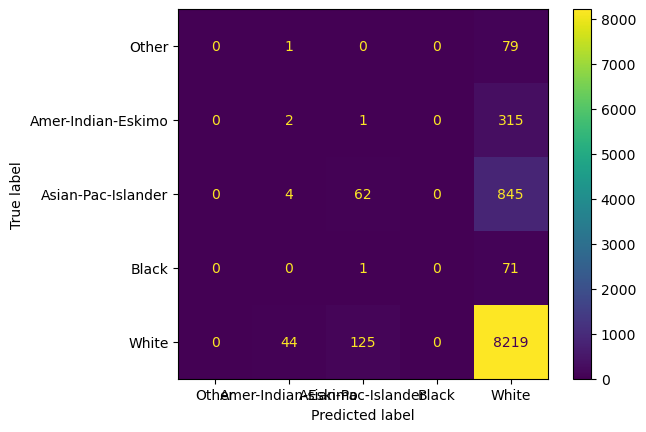

In [12]:
# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)
print("Dokładność modelu to: ",accuracy_score(y_test, y_pred))
pmatrix2 = ConfusionMatrixDisplay(matrix, display_labels=['Other','Amer-Indian-Eskimo','Asian-Pac-Islander','Black','White'])
pmatrix2.plot()

Interpretacja: Przypadek 'White' jezt zgadywany z bardzo dobrą dokładnością. Reszta klas zazwyczaj została w większości błędnie zidentyfikowana. Częściej występujące przypadki ('Amer-Indian-Eskimo','Asian-Pac-Islander') zostały zidentyfikowane z małą dokładnością. Pozostała klasy występowały znacząco mniej, model nie wykonał jednak dla nich pojedynczej predykcji. Model posiada wyjątkowo wysoką dokładność, nie jest jednak zachwycający rezultat, ponieważ model zgadywał niemalże zawsze na tą samą jedną klase. Jeżeli baza danych dominowana jest przez wpisy z tą właśnie pojedynczą klase, taka predykcja naturalnie zwróci dobrą "ogólną dokładność".

#### Przypadek 'native_country'

In [13]:
X = df.drop(['native_country'], axis=1)
y = df.native_country
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [14]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'income'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


Dokładność modelu to:  0.05640290715528713


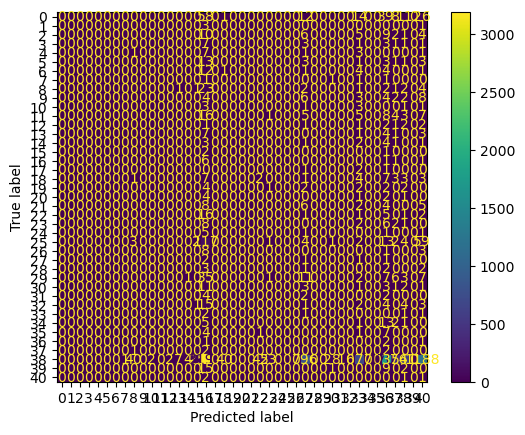

In [15]:
# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)
print("Dokładność modelu to: ",accuracy_score(y_test, y_pred))
pmatrix3 = ConfusionMatrixDisplay(matrix)
pmatrix3.plot()

Interpretacja: Model nie poradził sobie z zadaniem. Bardzo niska ogólna dokładność, model zgadywał tylko z małej ilości klas, połowa z nich nie otrzymała pojedynczej predykcji

### Wnioski
1)
Każda z podanych kolumn do predykcji posiadała coraz większą ilość możliwych klas, wraz ze wzrostem ilości klas predykcje były coraz mniej zadawalające. Oznacza to, wraz ze wzrostem ilości klasy coraz trudniej jest wytrenować poprawnie model. Zaobserwowano tendencje modelu, w którym gdy występowało wiele klas, tylko część z nich otrzymała jakiekolwiek predykcje, podczas gdy inne klasy nie otrzymały żadnej predykcji. 

2)
Charakterystyczna cecha uczenia maszynowego jest to, że zbiór baz danych do uczenia bardzo mocno wpływa na tworzenie modelu. Gdy klasy występowały w miare równomiernie (kolumna 'income') to dokładność predykcji dla osobnych klas jest większa. Gdy w bazie danych klasa jest mocno zdominowana przez pojedynczą klase, to model będzie prawie zawsze na nią zgadywać, skutkując wysoką dokładnością ogólną oraz dla tej pojydynczej klasy, jednak bardzo słabą dokładnością dla rzadko występującej reszcie klas.